In [110]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Examining the Data

In [225]:
# Let's start with reading the data 

users_data = pd.read_pickle("../../data/users_data_final.pkl")

In [226]:
# look at a preview of the data

users_data.head(n = 5)

,user_id,number_transactions,total_amount_usd,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,term_deposit,date_joined,device
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,3.0,2143.0,58,management,married,tertiary,False,True,False,None,261,1,-1,0,None,False,1998-08-23,mobile
1,bb92765a-08de-4963-b432-496524b39157,NaN,NaN,44,technician,single,secondary,False,True,False,None,151,1,-1,0,None,False,2008-07-15,desktop
2,573de577-49ef-42b9-83da-d3cfb817b5c1,2.0,2.0,33,entrepreneur,married,secondary,False,True,True,None,76,1,-1,0,None,False,2002-06-04,mobile
3,d6b66b9d-7c8f-4257-a682-e136f640b7e3,NaN,NaN,47,blue-collar,married,None,False,True,False,None,92,1,-1,0,None,False,1995-06-29,tablet
4,fade0b20-7594-4d9a-84cd-c02f79b1b526,1.0,1.0,33,None,single,None,False,False,False,None,198,1,-1,0,None,False,1995-08-01,mobile


In [227]:
# look at the shape of the data (rows, columns)

users_data.shape

(45209, 19)

In [228]:
# How many users do we have in the dataframe?

len(np.unique(users_data.user_id))

# as expected, this is same as the number of rows in the data

45209

In [229]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45209 entries, 0 to 45215
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              45209 non-null  object        
 1   number_transactions  35210 non-null  float64       
 2   total_amount_usd     35210 non-null  float64       
 3   age                  45209 non-null  int64         
 4   job                  44921 non-null  object        
 5   marital              45209 non-null  object        
 6   education            43352 non-null  object        
 7   default              45209 non-null  bool          
 8   housing              45209 non-null  bool          
 9   loan                 45209 non-null  bool          
 10  contact              32191 non-null  object        
 11  duration             45209 non-null  int64         
 12  campaign             45209 non-null  int64         
 13  pdays                45209 non-

### Feature Selection: Drop the Date Joined Variable

In [230]:
# Did you come up with a way to engineer date joined variable?
# if not drop this variable

users_data.drop(['date_joined'], axis = 1, inplace = True)


### Feature Engineering: Numerical Data

In [231]:
# identify all the numerical features

numerical_columns = list(users_data.select_dtypes(['float64', 'int64', 'bool']).columns)
print("# of numerial columns:", len(numerical_columns))

# of numerial columns: 11


In [232]:
numerical_columns

['number_transactions',
 'total_amount_usd',
 'age',
 'default',
 'housing',
 'loan',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'term_deposit']

In [233]:
# replace missing numerical values with 0

users_data['number_transactions'].fillna(0, inplace = True)
users_data['total_amount_usd'].fillna(0, inplace = True)


In [234]:
# identify highly correlated variables
# look at the correlations, can you see any combinations with

users_data.corr()

,number_transactions,total_amount_usd,age,default,housing,loan,duration,campaign,pdays,previous,term_deposit
number_transactions,1.000000,-0.053000,-0.006587,0.106674,0.023340,0.058259,-0.013408,0.018530,-0.025933,-0.016458,-0.041566
total_amount_usd,-0.053000,1.000000,0.082964,-0.056963,-0.058107,-0.073512,0.019620,-0.015878,0.004753,0.016606,0.044277
age,-0.006587,0.082964,1.000000,-0.017875,-0.185552,-0.015641,-0.004645,0.004767,-0.023745,0.001297,0.025168
default,0.106674,-0.056963,-0.017875,1.000000,-0.006020,0.077232,-0.010017,0.016819,-0.029982,-0.018331,-0.022421
housing,0.023340,-0.058107,-0.185552,-0.006020,1.000000,0.041341,0.005041,-0.023583,0.124197,0.037087,-0.139161
loan,0.058259,-0.073512,-0.015641,0.077232,0.041341,1.000000,-0.012395,0.009972,-0.022762,-0.011048,-0.068193
duration,-0.013408,0.019620,-0.004645,-0.010017,0.005041,-0.012395,1.000000,-0.084551,-0.001549,0.001213,0.394549
campaign,0.018530,-0.015878,0.004767,0.016819,-0.023583,0.009972,-0.084551,1.000000,-0.088636,-0.032860,-0.073179
pdays,-0.025933,0.004753,-0.023745,-0.029982,0.124197,-0.022762,-0.001549,-0.088636,1.000000,0.454817,0.103616
previous,-0.016458,0.016606,0.001297,-0.018331,0.037087,-0.011048,0.001213,-0.032860,0.454817,1.000000,0.093232


In [235]:
# we can use this code to identify highly correlated variables

threshold = 0.75 # define threshold

corr_matrix = users_data.corr().abs() # calculate the correlation matrix with 
high_corr_var = np.where(corr_matrix >= threshold) # identify variables that have correlations above defined threshold
high_corr_var = [(corr_matrix.index[x], corr_matrix.columns[y], round(corr_matrix.iloc[x, y], 2))
                         for x, y in zip(*high_corr_var) if x != y and x < y] # identify pairs of highly correlated variables


high_corr_var

[]

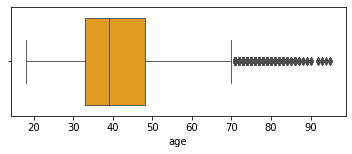

In [236]:
# identify outliers, lets start with age 
# draw a box plot for age

plt.figure(figsize=(6, 2))
sns.boxplot(x = users_data['age'], color = 'orange', linewidth = 0.9);

# question: does age have outliers?

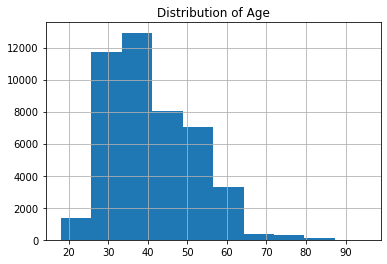

In [237]:
# draw a histogram for age

users_data['age'].hist()
plt.title("Distribution of Age");

# question: is age normally distributed?


In [238]:
users_data['age'].describe()

count    45209.000000
mean        40.935853
std         10.618653
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [239]:
# there is very minimal skew, let's assume that age is normally distributed and remove the outliers

UB = round(users_data['age'].mean() + 3*users_data['age'].std(), 0)
LB = round(users_data['age'].mean() - 3*users_data['age'].std(), 0)

print("Any age below this value is an outlier:", LB)
print("Any age above this value is an outlier:", UB)

Any age below this value is an outlier: 9.0
Any age above this value is an outlier: 73.0


In [240]:
# subset the dataframe, so we only consider ages which are greater than 9 and less than 73

users_data_cleaned = users_data[(users_data['age'] > LB) & (users_data['age'] < UB)]
users_data_cleaned.head()

,user_id,number_transactions,total_amount_usd,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,term_deposit,device
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,3.0,2143.0,58,management,married,tertiary,False,True,False,None,261,1,-1,0,None,False,mobile
1,bb92765a-08de-4963-b432-496524b39157,0.0,0.0,44,technician,single,secondary,False,True,False,None,151,1,-1,0,None,False,desktop
2,573de577-49ef-42b9-83da-d3cfb817b5c1,2.0,2.0,33,entrepreneur,married,secondary,False,True,True,None,76,1,-1,0,None,False,mobile
3,d6b66b9d-7c8f-4257-a682-e136f640b7e3,0.0,0.0,47,blue-collar,married,None,False,True,False,None,92,1,-1,0,None,False,tablet
4,fade0b20-7594-4d9a-84cd-c02f79b1b526,1.0,1.0,33,None,single,None,False,False,False,None,198,1,-1,0,None,False,mobile


In [241]:
# check the shape of the new data

users_data_cleaned.shape

(44828, 18)

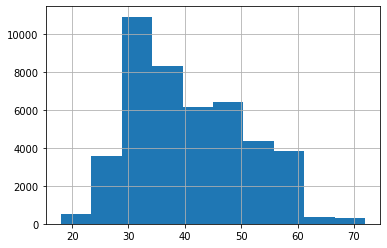

In [242]:
# check the distribution of age

users_data_cleaned.age.hist();

# what is the maximum value now?

In [243]:
# how many users did we drop?

print("# of rows dropped:", users_data.shape[0] - users_data_cleaned.shape[0])

# of rows dropped: 381


### Feature Engineering: Categorical Data

In [244]:
# identify all the categorical features

categorical_columns = list(users_data_cleaned.select_dtypes(['object']).columns)
print("# of categorical columns:", len(categorical_columns))

# of categorical columns: 7


In [245]:
# list of categorical columns

categorical_columns

['user_id', 'job', 'marital', 'education', 'contact', 'poutcome', 'device']

In [246]:
# We want to look at the distribution of e.g. jobs across all users
# We could use the value_counts function to get a count of unique values

users_job_dist = users_data_cleaned['job'].value_counts(dropna = False)
users_job_dist

blue-collar      9729
management       9447
technician       7597
admin.           5170
services         4154
retired          1919
self-employed    1576
entrepreneur     1486
unemployed       1303
housemaid        1226
student           938
NaN               283
Name: job, dtype: int64

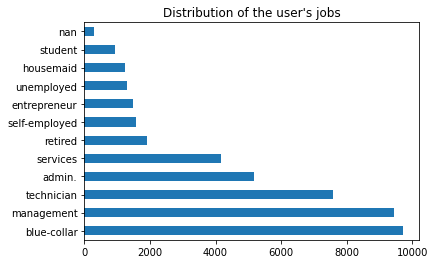

In [247]:
users_job_dist.plot(kind = 'barh')
plt.title("Distribution of the user's jobs");

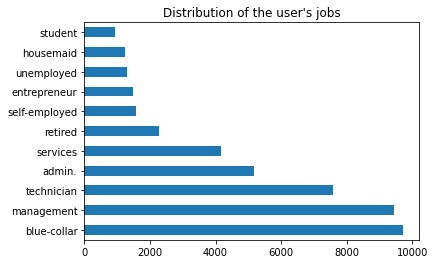

In [248]:
# without missing values

users_data['job'].value_counts().plot(kind = 'barh')
plt.title("Distribution of the user's jobs");


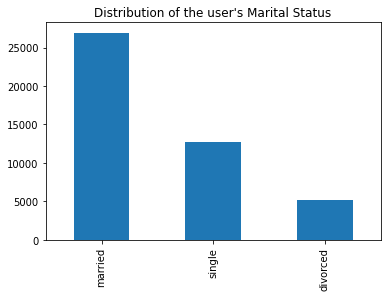

In [249]:
# lets plot another bar chart

users_data_cleaned['marital'].value_counts(dropna = False).plot(kind = 'bar')
plt.title("Distribution of the user's Marital Status");

In [250]:
# identify and replace missing values

users_data_cleaned.isnull().sum()

# question: which feature has the most missing data?

user_id                    0
number_transactions        0
total_amount_usd           0
age                        0
job                      283
marital                    0
education               1813
default                    0
housing                    0
loan                       0
contact                13018
duration                   0
campaign                   0
pdays                      0
previous                   0
poutcome               36719
term_deposit               0
device                    94
dtype: int64

In [251]:
# Another way to look at the missing values is the percentage of values that are missing

percent_missing = users_data_cleaned.isnull().mean() 

percent_missing

user_id                0.000000
number_transactions    0.000000
total_amount_usd       0.000000
age                    0.000000
job                    0.006313
marital                0.000000
education              0.040443
default                0.000000
housing                0.000000
loan                   0.000000
contact                0.290399
duration               0.000000
campaign               0.000000
pdays                  0.000000
previous               0.000000
poutcome               0.819109
term_deposit           0.000000
device                 0.002097
dtype: float64

In [252]:
# lets format this so we can sort it by the perecentage missing

def missing_dataframe(df):
    """
    @param df pandas DataFrame
    @return a DataFrame with the percentage of missing data for every feature
    """
    
    percent_missing = df.isnull().mean() 
    
    missing_value_df = pd.DataFrame(percent_missing).reset_index() # convert to DataFrame
    missing_value_df = missing_value_df.rename(columns = {"index" : "feature",
                                                                0 : "percent_missing"}) # rename columns

    missing_value_df = missing_value_df.sort_values(by = ['percent_missing'], ascending = False) # sort the values
    
    return missing_value_df

missing_value_df = missing_dataframe(users_data_cleaned)
missing_value_df

# question: which column has the most missing values?

,feature,percent_missing
15,poutcome,0.819109
10,contact,0.290399
6,education,0.040443
4,job,0.006313
17,device,0.002097
16,term_deposit,0.000000
14,previous,0.000000
13,pdays,0.000000
12,campaign,0.000000
11,duration,0.000000


In [253]:
# we want to remove any feature which has missing values more than a certain percentage

threshold = 0.75

features_w_missing_data = list(missing_value_df[missing_value_df.percent_missing > 0.75].feature)
print("number of a features with missing data more than defined threshold:", len(features_w_missing_data))

number of a features with missing data more than defined threshold: 1


In [254]:
# drop the feature that has a high percentage of missing data

users_data_cleaned.drop(features_w_missing_data, axis = 1, inplace = True)

/Users/shaq/.pyenv/versions/3.8.10/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [255]:
# identifying missing data agin - you can also use the definition

users_data_cleaned.isnull().sum()

user_id                    0
number_transactions        0
total_amount_usd           0
age                        0
job                      283
marital                    0
education               1813
default                    0
housing                    0
loan                       0
contact                13018
duration                   0
campaign                   0
pdays                      0
previous                   0
term_deposit               0
device                    94
dtype: int64

In [256]:
# replace missing values with "Unknown"

users_data_cleaned['job'].fillna("Unknown", inplace = True)
users_data_cleaned['education'].fillna("Unknown", inplace = True)
users_data_cleaned['contact'].fillna("Unknown", inplace = True)
users_data_cleaned['device'].fillna("Unknown", inplace = True)


/Users/shaq/.pyenv/versions/3.8.10/lib/python3.8/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [257]:
missing_value_df = missing_dataframe(users_data_cleaned)
missing_value_df

,feature,percent_missing
0,user_id,0.0
9,loan,0.0
15,term_deposit,0.0
14,previous,0.0
13,pdays,0.0
12,campaign,0.0
11,duration,0.0
10,contact,0.0
8,housing,0.0
1,number_transactions,0.0


In [258]:
# before building our model, we need to encode the categorical data
# lots of ways to do that, but we will use pd.get_dummies function
# lets start with marital

pd.get_dummies(users_data_cleaned['marital'], prefix='marital')

# you can also one of dummy variables, as it can be inferred by the other dummy variables

,marital_divorced,marital_married,marital_single
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1
...,...,...,...
45211,0,1,0
45212,1,0,0
45213,0,1,0
45214,0,1,0


In [259]:
users_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44828 entries, 0 to 45215
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              44828 non-null  object 
 1   number_transactions  44828 non-null  float64
 2   total_amount_usd     44828 non-null  float64
 3   age                  44828 non-null  int64  
 4   job                  44828 non-null  object 
 5   marital              44828 non-null  object 
 6   education            44828 non-null  object 
 7   default              44828 non-null  bool   
 8   housing              44828 non-null  bool   
 9   loan                 44828 non-null  bool   
 10  contact              44828 non-null  object 
 11  duration             44828 non-null  int64  
 12  campaign             44828 non-null  int64  
 13  pdays                44828 non-null  int64  
 14  previous             44828 non-null  int64  
 15  term_deposit         44828 non-null 

In [260]:
# how many categories does every categorial feature have

categorical_columns = list(users_data_cleaned.select_dtypes(['object']).columns)

for c in categorical_columns:
    print(c,":",len(users_data_cleaned[c].value_counts(dropna = False)))


user_id : 44828
job : 12
marital : 3
education : 4
contact : 3
device : 4


In [261]:
# drop any feature that has more than 10 categories

users_data_cleaned.drop(['user_id', 'job'], axis = 1, inplace = True)

/Users/shaq/.pyenv/versions/3.8.10/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [262]:
def one_hot(df, categorical_cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with one-hot encoding
    """
    
    for c in categorical_cols:
        dummies = pd.get_dummies(df[c], prefix=c, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
        df.drop(c, axis = 1, inplace = True)
    
    return df

In [263]:
categorical_columns = list(users_data_cleaned.select_dtypes(['object']).columns)

users_data_cleaned_w_encoding = one_hot(users_data_cleaned, categorical_columns)

In [264]:
users_data_cleaned_w_encoding.head()

,number_transactions,total_amount_usd,age,default,housing,loan,duration,campaign,pdays,previous,...,education_primary,education_secondary,education_tertiary,contact_Unknown,contact_cellular,contact_telephone,device_Unknown,device_desktop,device_mobile,device_tablet
0,3.0,2143.0,58,False,True,False,261,1,-1,0,...,0,0,1,1,0,0,0,0,1,0
1,0.0,0.0,44,False,True,False,151,1,-1,0,...,0,1,0,1,0,0,0,1,0,0
2,2.0,2.0,33,False,True,True,76,1,-1,0,...,0,1,0,1,0,0,0,0,1,0
3,0.0,0.0,47,False,True,False,92,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
4,1.0,1.0,33,False,False,False,198,1,-1,0,...,0,0,0,1,0,0,0,0,1,0


In [265]:
users_data_cleaned_w_encoding.info()

# question: does anyone see any numerical data?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44828 entries, 0 to 45215
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   number_transactions  44828 non-null  float64
 1   total_amount_usd     44828 non-null  float64
 2   age                  44828 non-null  int64  
 3   default              44828 non-null  bool   
 4   housing              44828 non-null  bool   
 5   loan                 44828 non-null  bool   
 6   duration             44828 non-null  int64  
 7   campaign             44828 non-null  int64  
 8   pdays                44828 non-null  int64  
 9   previous             44828 non-null  int64  
 10  term_deposit         44828 non-null  bool   
 11  marital_divorced     44828 non-null  uint8  
 12  marital_married      44828 non-null  uint8  
 13  marital_single       44828 non-null  uint8  
 14  education_Unknown    44828 non-null  uint8  
 15  education_primary    44828 non-null 

In [266]:
# write this cleaned dataset

users_data_cleaned_w_encoding.to_pickle("../../data/users_data_cleaned_w_encoding.pkl")

### Building the first machine learning model

In [298]:
# read the cleaned data, if we did not have time to go through all the steps

users_data = pd.read_pickle("../../data/users_data_cleaned_w_encoding.pkl")

users_data.head()

,number_transactions,total_amount_usd,age,default,housing,loan,duration,campaign,pdays,previous,...,education_primary,education_secondary,education_tertiary,contact_Unknown,contact_cellular,contact_telephone,device_Unknown,device_desktop,device_mobile,device_tablet
0,3.0,2143.0,58,False,True,False,261,1,-1,0,...,0,0,1,1,0,0,0,0,1,0
1,0.0,0.0,44,False,True,False,151,1,-1,0,...,0,1,0,1,0,0,0,1,0,0
2,2.0,2.0,33,False,True,True,76,1,-1,0,...,0,1,0,1,0,0,0,0,1,0
3,0.0,0.0,47,False,True,False,92,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
4,1.0,1.0,33,False,False,False,198,1,-1,0,...,0,0,0,1,0,0,0,0,1,0


In [299]:
# check the shape of the data

users_data.shape

(44828, 25)

In [300]:
# check all numerical

users_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44828 entries, 0 to 45215
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   number_transactions  44828 non-null  float64
 1   total_amount_usd     44828 non-null  float64
 2   age                  44828 non-null  int64  
 3   default              44828 non-null  bool   
 4   housing              44828 non-null  bool   
 5   loan                 44828 non-null  bool   
 6   duration             44828 non-null  int64  
 7   campaign             44828 non-null  int64  
 8   pdays                44828 non-null  int64  
 9   previous             44828 non-null  int64  
 10  term_deposit         44828 non-null  bool   
 11  marital_divorced     44828 non-null  uint8  
 12  marital_married      44828 non-null  uint8  
 13  marital_single       44828 non-null  uint8  
 14  education_Unknown    44828 non-null  uint8  
 15  education_primary    44828 non-null 

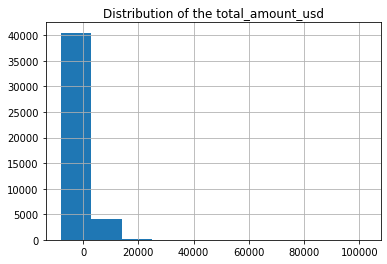

In [302]:
# Define the target, our y
# lets say we want to predict the total_amount_usd

users_data.total_amount_usd.hist()
plt.title("Distribution of the total_amount_usd");

# Distribution of variable is skewed, we could also transform the variable in next iteraions


/Users/shaq/.pyenv/versions/3.8.10/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


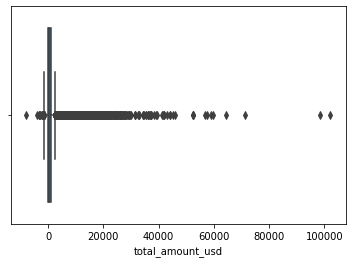

In [303]:
sns.boxplot(users_data.total_amount_usd);

# Outliers exist, in next iterations we may want to remove them

In [305]:
# Step 1. Define the target and features
# A supervised machine learning algorithm requires both - uses historical data to uncover relationships between other features of your dataset and the target.

target_data = users_data.total_amount_usd
features = users_data.drop(["total_amount_usd"], axis = 1)


In [306]:
# Step 2. Split the data into a training and test set
# The training data is the data we use to train the machine learning algorithm
# the test set is used to evaluate the prediction

# using this handy function from scikit-learm to split the data into a training and test dataset
# we can adjust the test size to our needs, but it's best practise to train the model on 70 - 80% of the data

X_train, X_test, y_train, y_test = train_test_split(
                                                features, 
                                                target_data,
                                                test_size = 0.2, 
                                                random_state = 42)


In [307]:
# print the shape of the training data

print("Training Data")
print(X_train.shape)
print(y_train.shape)

Training Data
(35862, 24)
(35862,)


In [308]:
# print the shape of the test data 

print("\nTest Data")
print(X_test.shape)
print(y_test.shape)


Test Data
(8966, 24)
(8966,)


In [309]:
# Step 3. Import the Logistic Regression model from sklearn

lr = LinearRegression()

In [310]:
# Step 4. Fit the model on the scaled training data

lr.fit(X_train, y_train) 

# This is your machine learning model!

LinearRegression()

In [311]:
# Step 5. Evaluate how well the model predicts on unseen data

y_pred = lr.predict(X_test) 


In [312]:
print("first five predicted total amounts:", y_pred[0:5])
print("first five actual total amounts:", list(y_test[0:5]))

first five predicted total amounts: [1339.57791924 1626.1949582  1387.96292225 1197.65770369 1049.41818258]
first five actual total amounts: [567.0, 2820.0, 306.0, 120.0, 111.0]


In [313]:
# We will use r2 to evaluating the model performance.

r2_score(y_test, y_pred)

# R^2 (coefficient of determination) regression score function.
# Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). 

# Pretty close to 0. Lets see over the next few weeks we can improve the score.


0.02541281412601626